#### Importons les packages necessaires pour notre travail

In [266]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [271]:
#voyons s'il y'a des valeurs manquants 
data = pd.read_csv('Salary_dataset.csv')
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [273]:
data.shape

(30, 3)

Notre base est constitue de 30 lignes et 3 colonnes

In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [276]:
# On peut le voir plus explicitement grace à la commende ci-dessous 

data.isna().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [283]:
data1=data.copy()
data1 = data1.drop(['Unnamed: 0'], axis=1)
data1.head(4)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0


In [304]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.413333,2.837888,1.2,3.30,4.8,7.80,10.6
Salary,30.0,76004.000000,27414.429785,37732.0,56721.75,65238.0,100545.75,122392.0


In [329]:
X=data1[['YearsExperience']]
Y=data1[['Salary']]


In [332]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=1)

In [333]:
modeli= LinearRegression()
modeli.fit(x_train,y_train)


LinearRegression()

In [335]:
modeli.coef_

array([[9202.23359825]])

In [336]:
modeli.intercept_

array([25130.35435562])

### Salary = 25130.35 + 9202.23*YearsExperience

In [104]:
25130.354 + 9202.233*1.4

38013.4802

In [105]:
model. predict(x_test)

array([[ 74822.41578619],
       [ 91386.43626305],
       [ 61939.28874864],
       [ 81263.97930497],
       [ 67460.62890759],
       [ 88625.76618357],
       [113471.79689886],
       [ 44455.04491195],
       [106110.01002026]])

In [107]:
#coefficient de determination
model.score(x_train, y_train)*100

96.0775692121653

In [108]:
# 96% de la variation du salaire est expliqué par le model

In [110]:
model.score(x_test, y_test)*100

92.48580247217076

In [111]:
# 92% de la variation du salaire est expliqué par le nombre d'année d'expériences

In [114]:
model_prediction=model.predict(x_test)
model_prediction

array([[ 74822.41578619],
       [ 91386.43626305],
       [ 61939.28874864],
       [ 81263.97930497],
       [ 67460.62890759],
       [ 88625.76618357],
       [113471.79689886],
       [ 44455.04491195],
       [106110.01002026]])

In [125]:
x=pd.DataFrame(X)
y=pd.DataFrame(Y)
mat=pd.concat([x,y],axis=1)
model_prediction=model.predict(x)
y_predict=pd.DataFrame(model_prediction,columns=['y_pred'])
y_frames=[mat,y_predict]
mat=pd.concat(y_frames,axis=1)
mat

,YearsExperience,Salary,y_pred
0,1.2,39344.0,36173.034674
1,1.4,46206.0,38013.481393
2,1.6,37732.0,39853.928113
3,2.1,43526.0,44455.044912
4,2.3,39892.0,46295.491632
5,3.0,56643.0,52737.055150
6,3.1,60151.0,53657.278510
7,3.3,54446.0,55497.725230
8,3.3,64446.0,55497.725230
9,3.8,57190.0,60098.842029


In [129]:
from sklearn import metrics
# mesurons l'écart moyen entre les prédictions et les valeurs réelles
MAE=metrics.mean_absolute_error(mat.Salary, mat.y_pred)
print(MAE)

4753.997284296918


In [131]:
#Il mesure l'écart moyen entre les valeurs prédites et les valeurs réelles en calculant la racine carrée de la moyenne des erreurs au carré.
# Plus le RMSE est faible plus le model est precis
RMSE=np.sqrt(MAE)
print(RMSE)

68.94923701025935


RMSE est Faible donc on peut dire que le modèle est précis

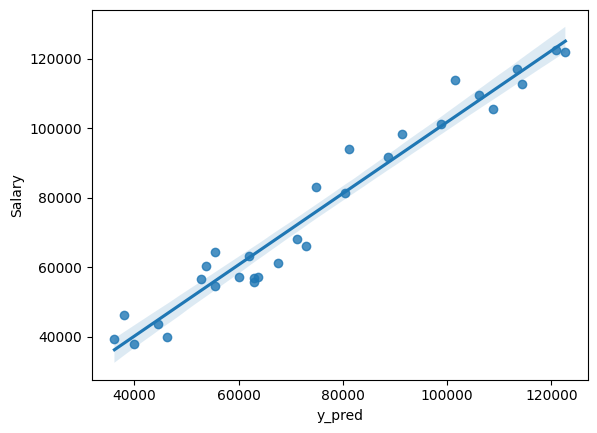

In [134]:
sns.regplot(x='y_pred',y='Salary',data=mat)
plt.show()

On voit que la courbe passe effectivement par le maximum de point

# Regression lineaire multiple

In [222]:
from pyforest import*
lazy_imports()

['import gensim',
 'from sklearn.manifold import TSNE',
 'from sklearn.preprocessing import MinMaxScaler',
 'import plotly.graph_objs as go',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.linear_model import LassoCV',
 'import bokeh',
 'import textblob',
 'from scipy import stats',
 'from sklearn import metrics',
 'import fastai',
 'from sklearn.ensemble import RandomForestClassifier',
 'import statistics',
 'import skimage',
 'from sklearn.linear_model import ElasticNetCV',
 'import glob',
 'from sklearn.preprocessing import StandardScaler',
 'import lightgbm as lgb',
 'import imutils',
 'import awswrangler as wr',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn import svm',
 'import pydot',
 'from sklearn.linear_model import RidgeCV',
 'import tensorflow as tf',
 'import os',
 'import pickle',
 'import keras',
 'import tqdm',
 'import numpy as np',
 'import plotly as py',
 'from sklearn.model_selection import StratifiedKFold',
 'from s

In [223]:
BD = pd.read_csv('Student_Perf.csv')
BD.head(20)

<IPython.core.display.Javascript object>

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


## <span style="color:blue">**Description des variables de la base**</span>

#### <span style="color:darkred">**Hours Studied :**</span> nombre total d'heures consacrées à l'étude par chaque élève.  
#### <span style="color:darkred">**Previous Scores :**</span> notes obtenues par les élèves lors des tests précédents.  
#### <span style="color:darkred">**Extracurricular Activities :**</span> participation ou non de l'élève à des activités extrascolaires (Oui ou Non).
#### <span style="color:darkred">**Sleep Hours :**</span> nombre moyen d'heures de sommeil par jour de l'élève.
#### <span style="color:darkred">**Sample Question Papers Practiced :**</span> nombre d'exemples de sujets d'examen traités par l'élève.
#### <span style="color:darkred">**Performance Index :**</span> mesure de la performance globale de chaque élève. L'indice de performance représente les résultats scolaires de l'élève et a été arrondi à l'entier le plus proche. L'indice varie de 10 à 100, les valeurs les plus élevées indiquant les meilleures performances.

In [224]:
BD.shape

(10000, 6)

#### La base est composée de 10000 lignes et 6 colonnes

In [225]:
BD.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [226]:
BD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [227]:
## descriptive
BD.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [228]:
BD['Extracurricular Activities'] = BD['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})
BD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16684\1148412907.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BD['Extracurricular Activities'] = BD['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})


In [229]:
BD.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

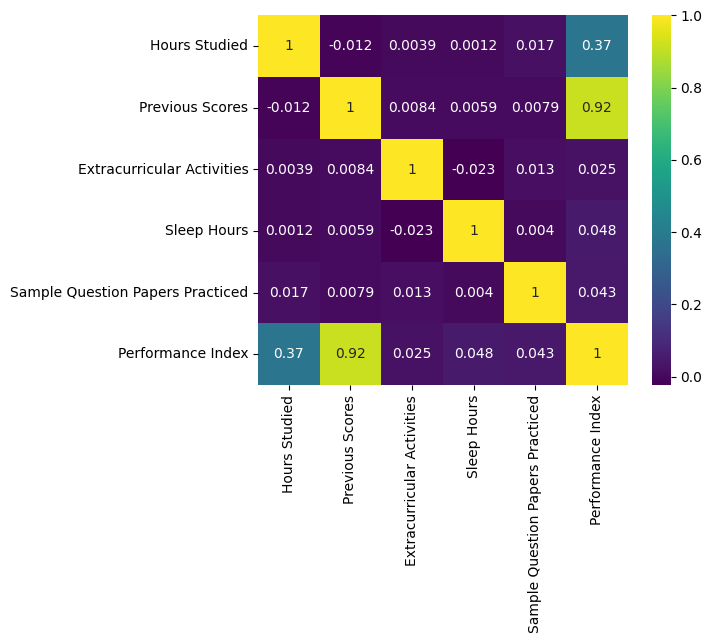

In [230]:
sns.heatmap(BD.corr(),  vmax=1, square=True, annot=True, cmap='viridis')
plt.show()

On voit qu'il y'a une forte correlation entre les variables Previous Scores et Performance Index.  
On voit qu'il y'a une forte correlation entre les variables Hours studied et Performance index.

In [231]:
# Préparons nos données pour la modélisation 
Y=BD[['Performance Index']]
X=BD.iloc[:,0:5]
Y.shape

(10000, 1)

In [232]:
## Entrainons le model 
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=1)

<IPython.core.display.Javascript object>

In [233]:
# Ajustons le modèle linéaires
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)

<IPython.core.display.Javascript object>

LinearRegression()

In [234]:
# Affichons les coéfficients du model
for k, col_name in enumerate(x_train.columns): 
    print('le coéfficient de {} est {}'.format(col_name, reg_model.coef_[0][k]))

le coéfficient de Hours Studied est 2.854060218393497
le coéfficient de Previous Scores est 1.0182668460485187
le coéfficient de Extracurricular Activities est 0.5965951722087275
le coéfficient de Sleep Hours est 0.4755104485435737
le coéfficient de Sample Question Papers Practiced est 0.19146724619304523


In [235]:
reg_model.intercept_

array([-33.99877455])

#### Performance index = -34 + 2.85 Hours Studied + 1.018 Previous Score + 0.59 Extra_Activ + 0.47 Sleep Hours + 0.19 QPP

In [236]:
# Calculons le coéfficient de determination R2 
k1=reg_model.score(x_train, y_train)*100
print(f'{round(k1,2)}% de la variation de la performance des élèves est expliqué par le model')

98.89% de la variation de la performance des élèves est expliqué par le model


In [237]:
# Calculons le coéfficient de determination sur la variable de test 
k2= reg_model.score(x_test, y_test)*100
print(f'{round(k2,2)}% de la variation de la performance est explique par le model')

98.84% de la variation de la performance est explique par le model


In [259]:
# Predicte x_train 
x = pd.DataFrame(X)
y = pd.DataFrame(Y)
mat = pd.concat([x,y],axis=1)
model_prediction = reg_model.predict(x)
y_predict = pd.DataFrame(model_prediction,columns=['y_prediction'])
y_frames=[mat,y_predict]
mat=pd.concat(y_frames,axis=1)
mat.head(5)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,y_prediction
0,7,99,1,9,1,91.0,91.855721
1,4,82,0,4,2,65.0,63.200324
2,8,51,1,7,2,45.0,45.073419
3,5,52,1,5,2,36.0,36.578484
4,7,75,0,8,5,66.0,67.111080


In [261]:
BD.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


#### Le modèle explique aisement la perforance des élèves tenant compte des variables explicatives

In [243]:
Interact = PolynomialFeatures(degree=2, interaction_only=True)
x_train2 = Interact.fit_transform(x_train)
x_test2 = Interact.fit_transform(x_test)

<IPython.core.display.Javascript object>

In [244]:
from sklearn import linear_model
model_Interact =  linear_model.LinearRegression()
model_Interact.fit(x_train2, y_train)

LinearRegression()

In [247]:
y_pred = model_Interact.predict(x_test2)
# print(y_pred)